# Image Blurring Techniques with OpenCV

In this notebook, we will explore different types of **image blurring (smoothing)** techniques using OpenCV.  
Blurring is commonly used to reduce noise, smooth details, or create artistic effects.

We will use the sample image stored at:  
`assets/Image2.jpg`

---

## 1. Import Libraries

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display two images side by side
def show_side_by_side(title1, img1, title2, img2):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    if len(img1.shape) == 2:
        plt.imshow(img1, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")
    
    plt.subplot(1,2,2)
    if len(img2.shape) == 2:
        plt.imshow(img2, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    
    plt.show()


## 2. Load the Image

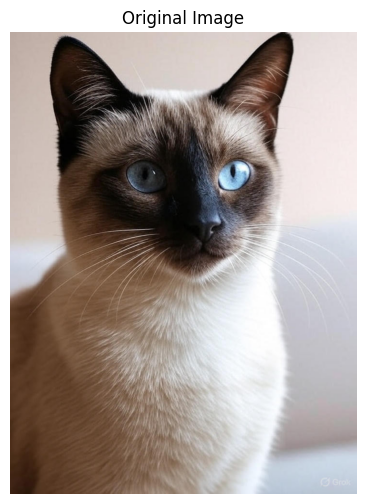

In [43]:
# Load the image
image = cv2.imread("assets/Image1.jpeg")

# Show original
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()


## 🔹 1. Average Blur

**Description:**  
- Each pixel is replaced with the **average of its neighboring pixels**.  
- Creates a simple smoothing effect, but it can blur edges significantly.  

- Works by averaging all pixel values within the kernel region.  
- Produces uniform smoothing across the image.  
- **To increase blur intensity:**  
  - Increase the **kernel size** `(k x k)`. Larger kernels cause stronger blur. 

**Use Case:**  
- Reducing overall noise.  
- Quick and simple blur for preprocessing.

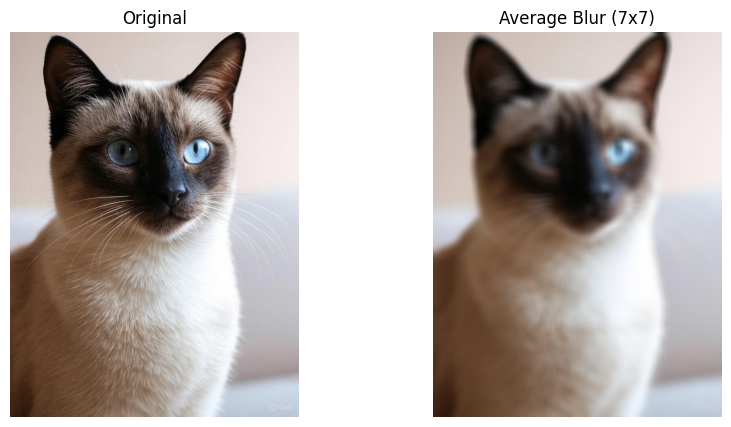

In [44]:
# Apply Average Blur
average_blur = cv2.blur(image, (20,20))

# Compare with original
show_side_by_side("Original", image, "Average Blur (7x7)", average_blur)



## 🔹 2. Gaussian Blur

**Description:**  
- Uses a **Gaussian kernel** where closer pixels have higher weights.  
- Produces a more **natural-looking blur** compared to average blur.  
- Uses a Gaussian (bell-shaped) function to weigh pixels, giving more importance to central ones.  
- Produces a soft and natural blur.  
- **To increase blur intensity:**  
  - Increase the **kernel size** `(k x k)`.  
  - Increase the **standard deviation (sigma)** value. Both make the blur stronger. 

**Use Case:**  
- Removing Gaussian noise.  
- Preprocessing before edge detection.  
- Image smoothing while retaining some details.

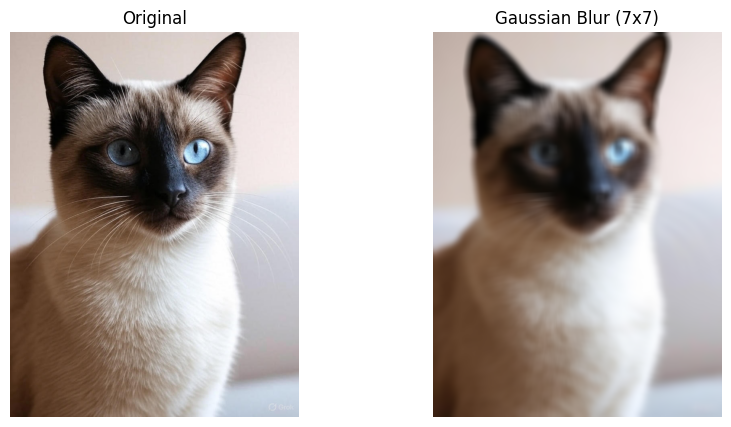

In [45]:
# Apply Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (21,21), 20)

show_side_by_side("Original", image, "Gaussian Blur (7x7)", gaussian_blur)


## 🔹 3. Median Blur

**Description:**  
- Each pixel is replaced with the **median value** of the neighboring pixels.  
- Very effective for removing **salt & pepper noise**.  
- Replaces each pixel with the **median** of the surrounding pixels in the kernel.  
- Very effective at removing **salt-and-pepper noise** while preserving edges.  
- **To increase blur intensity:**  
  - Increase the **kernel size** (must be an odd number, e.g., 3, 5, 7...).

**Use Case:**  
- Denoising images with impulse noise.  
- Preserving edges better than average blur.

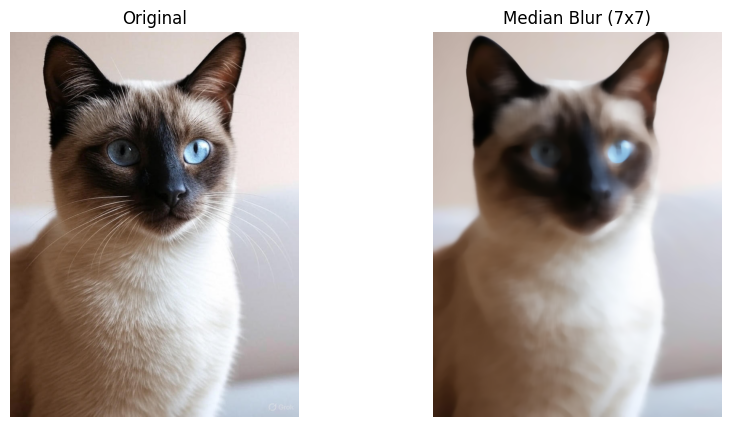

In [46]:
# Apply Median Blur
median_blur = cv2.medianBlur(image, 21)

# Compare with original
show_side_by_side("Original", image, "Median Blur (7x7)", median_blur)


## 🔹 4. Bilateral Filter

**Description:**  
- Blurs the image **while preserving edges**.  
- Takes into account both **spatial distance** (pixel location) and **intensity difference** (pixel color/brightness).  
- Considers both spatial closeness and pixel intensity difference.  
- Smooths flat regions while preserving sharp edges.  
- **To increase blur intensity:**  
  - Increase **diameter (d)** of the neighborhood.  
  - Increase **sigmaColor** (how much color difference is allowed to blend).  
  - Increase **sigmaSpace** (how far pixels can influence each other).

**Use Case:**  
- Denoising natural images (faces, landscapes).  
- Applications where edges must remain sharp. 

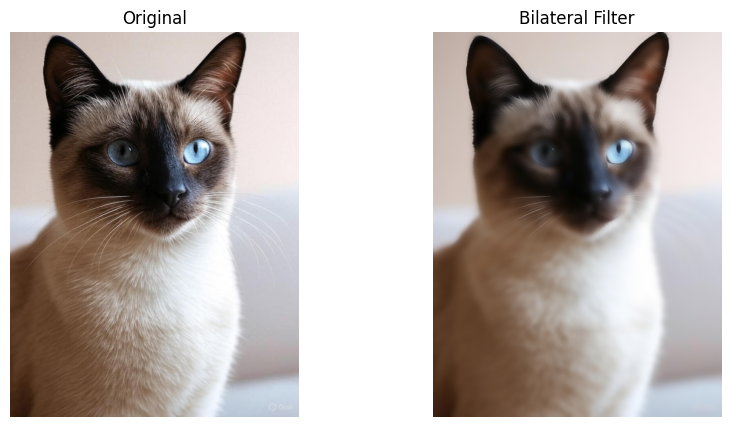

In [47]:
# Apply Bilateral Filtering
bilateral_blur = cv2.bilateralFilter(image, 20, 200, 200)

# Compare with original
show_side_by_side("Original", image, "Bilateral Filter", bilateral_blur)


## 5. Motion Blur (Custom Kernel)  
- Simulates motion by averaging pixels along a specific direction (horizontal, vertical, or diagonal).  
- Creates a streaking effect as if the camera or object moved.  
- **To increase blur intensity:**  
  - Increase the **length of the motion kernel** (e.g., from 5 → 15 → 30).  
  - Longer kernels create stronger motion blur. 

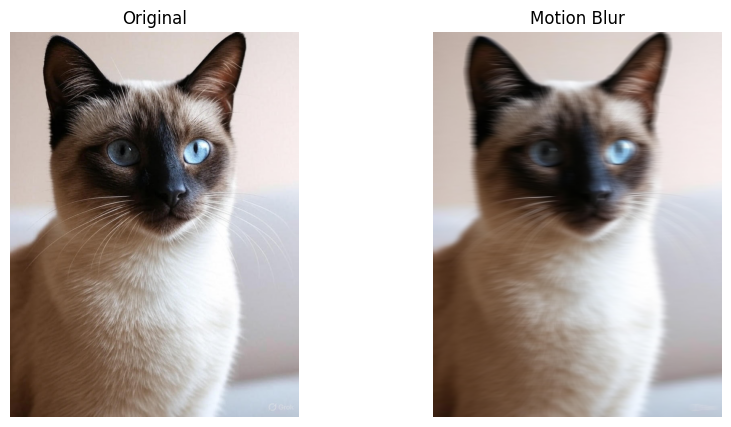

In [48]:
# Define the size of the motion blur kernel
kernel_size = 20

# Create a motion blur kernel (horizontal motion)
motion_kernel = np.zeros((kernel_size, kernel_size))
motion_kernel[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
motion_kernel = motion_kernel / kernel_size

# Apply the kernel to the image
motion_blur = cv2.filter2D(image, -1, motion_kernel)

# Compare with original
show_side_by_side("Original", image, "Motion Blur", motion_blur)

## Comparison of Blurring Techniques

Let's compare all techniques side by side.

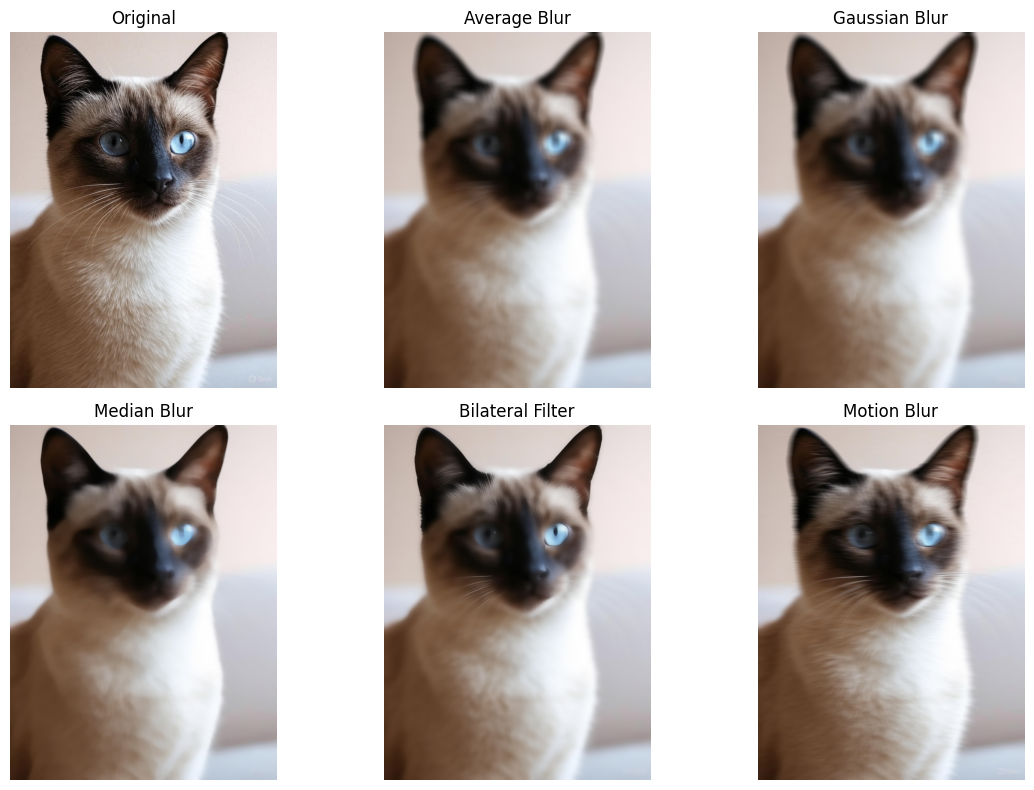

In [49]:
plt.figure(figsize=(12,8))

titles = ["Original", "Average Blur", "Gaussian Blur", "Median Blur", "Bilateral Filter", "Motion Blur"]
images = [image, average_blur, gaussian_blur, median_blur, bilateral_blur, motion_blur]

for i in range(6):
    plt.subplot(2,3,i+1)
    img = images[i]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# 📌 Summary of Blur Types

- **Average Blur** → Simple smoothing, but edges are blurred.  
- **Gaussian Blur** → Natural smoothing, commonly used in computer vision.  
- **Median Blur** → Best for removing salt & pepper noise.  
- **Bilateral Filter** → Smooths noise while keeping edges sharp.